# Библиотеки Python для DS (семинары)

Урок 10. Практическое применение метода K-Means. Иерархическая кластеризация

Цель: Проанализировать данные о заработной плате сотрудников из файла ds_salaries.csv и построить модели машинного обучения для прогнозирования заработной платы.

Задачи:

1. Первичный анализ данных:
— Импортировать данные из файла ds_salaries.csv.
— Очистить данные от дубликатов и пропущенных значений.
— Исследовать типы данных, описательную статистику и корреляции между признаками.
— Визуализировать данные с помощью Matplotlib и Seaborn.

2. Построение модели линейной регрессии:
— Разделить данные на обучающую и тестовую выборки.
— Построить модель линейной регрессии для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.
— Проанализировать значимость признаков и мультиколлинеарность.

3. Построение модели дерева решений:
— Построить модель дерева решений для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик RMSE и R-квадрат.
— Подберите гиперпараметры для модели дерево решений
— Визуализировать дерево решений.

4. Построение ансамблевой модели:
— Построить ансамблевую модель, используя Random Forest и Boosting.
— Сравнить качество ансамблевой модели с отдельными моделями.
— Оценить важность признаков в ансамблевой модели.

5. Понижение размерности:
— Применить Principal Component Analysis (PCA) для снижения размерности данных.
— Построить модель линейной регрессии с использованием данных, полученных после PCA.
— Сравнить качество модели с использованием исходных данных.

7. Кластеризация:
— Применить метод K-Means для кластеризации данных по заработной плате.
— Определить оптимальное количество кластеров.
— Проанализировать характеристики полученных кластеров.
— Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.
— Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means.

## Выполнение домашней работы

##### Используем предоставленый к заданию файл fetch_california_housing.xlsx

In [ ]:
# Библиотеки для работы с датасетом и графиками
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, silhouette_score, rand_score, calinski_harabasz_score
import xgboost as xgb
from sklearn.cluster import KMeans, DBSCAN

##### 1. Первичный анализ данных:

— Импортировать данные из файла ds_salaries.csv.

— Очистить данные от дубликатов и пропущенных значений.

— Исследовать типы данных, описательную статистику и корреляции между признаками.

— Визуализировать данные с помощью Matplotlib и Seaborn.

In [2]:
# Загружаем датасет
df = pd.read_csv('ds_salaries.csv')

In [3]:
# Выводим дата фрейм
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


work_year: Это конкретный год, в котором была выплачена заработная плата. В разные годы могут быть разные экономические условия, которые могут повлиять на уровень заработной платы.

experience_level: уровень опыта, который человек имеет на конкретной работе. Это является ключевым фактором при расчете заработной платы, поскольку, как правило, более опытные сотрудники получают более высокую зарплату благодаря своим передовым навыкам и знаниям.

employment_type: Характер трудового договора, например, полный рабочий день, неполный рабочий день или по контракту, может существенно влиять на заработную плату. Сотрудники, работающие полный рабочий день, часто получают более высокую годовую заработную плату по сравнению со своими коллегами, работающими неполный рабочий день или по контракту.
FT (Полный рабочий день), СТ (Контракт), FL(Фриланс), РТ (Частичная занятость)

job_title: Должность, которую человек занимает в компании. Разные должности имеют разную шкалу заработной платы в зависимости от требуемых обязанностей и навыков. Например, на руководящих должностях обычно платят больше, чем на должностях начального уровня.

salary: общая сумма заработной платы, выплачиваемой сотруднику. На это напрямую влияют такие факторы, как уровень опыта, название должности и тип занятости.

salary_currency: Конкретная валюта, в которой выплачивается заработная плата, обозначаемая кодом ISO 4217. Обменные курсы могут влиять на величину заработной платы при пересчете в разные валюты.

salary_in_usd: Общая сумма заработной платы брутто, пересчитанная в доллары США. Это позволяет проводить единообразное сравнение заработной платы в разных странах и валютах.

employee_residence: Основная страна проживания сотрудника, обозначаемая кодом ISO 3166. Стоимость жизни и преобладающие ставки заработной платы в стране проживания сотрудника могут влиять на уровень заработной платы.

remote_ratio: доля работы, выполняемой удаленно. С ростом удаленной работы компании могут корректировать заработную плату в зависимости от стоимости жизни в месте нахождения сотрудника и доли удаленной работы.

company_location: местоположение главного офиса работодателя или филиала, с которым заключен контракт. Компании в разных регионах могут предлагать разные уровни заработной платы из-за различных экономических условий и стоимости жизни.

company_size:  Среднее число сотрудников в компании в течение рабочего года. Крупные компании часто имеют структурированную шкалу заработной платы и могут предлагать более высокие оклады за счет эффекта масштаба и увеличения доходов.

In [4]:
# Выводим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Из общей информации следует:
1. Всего 10 колонок, DataFrame содержит 3755 записи, от 0 до 3754
2. Нулевые значения отсуствуют
3. Пропущеные значения отсуствуют
4. Колонки: work_year, salary, salary_in_usd, remote_ratio находятся в целочисленых значениях int64
5. Колонки: experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size являются объектами object

In [5]:
# Статистический анализ числовых переменных
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

1. work_year (Год выплаты зарплаты): 
- Средний уровень выплаты зарплаты на уровне 2022
- Миниманая 2020
- Максимальная 2023
- Медиана равна 190695,58
- Отклонение состовляет 671676,50
2. salary (Сумма зарплаты):
- Средняя сумма зарплаты на уровне 138000.00
- Миниманая 6000.00
- Максимальная 30400000.00
- Медиана равна 190695.58
- Отклонение состовляет 671676.50
3. salary_in_usd (Сумма зарплаты в USD):
- Средняя сумма зарплаты в USD на уровне 135000.00
- Миниманая 5132.00
- Максимальная 450000.00
- Медиана равна 137570.39
- Отклонение состовляет 63055.63
4. remote_ratio (доля работы выполняемой удалённо):
- Средние доля работы выполняемой удалёно на уровне 0.00
- Миниманая 0.00
- Максимальная 100.00
- Медиана равна 46.27
- Отклонение состовляет 48.59

In [6]:
# Статистический анализ объектных признаков
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


1. experience_level (Опыт работы):
- В данных присутствуют записи о поле у 3755 записей.
- Имеются четыре уникальные записи о опыте работы.
- Наиболее часто встречающийся запись - SE, с частотой 2516 раз.

2. employment_type (Характер трудового договора):
- Для 3755 записей о трудовых договорах.
- Имеются четыре уникальные записи трудового договора.
- Наиболее часто встречающийся запись - FT, с частотой 3718 раз.

3. job_title (Должность):
- Информация о должностях состовляет 3755 записей.
- Имеется 93 уникальные должности.
- Наиболее распространенная должность Data Engineer, встречается 1040 раз.

4. salary_currency (Вид валюты):
- Информация о видах валюты состовляет 3755 записей.
- Выявлено 20 различных видов валюты.
- Наиболее распространенная валютв USD, встречается 3224 раз.

5. employee_residence (Страна проживания сотрудника):
- Информация о странах проживания состовляет 3755 записей.
- В данных есть 78 уникальных стран.
- Наиболее частавстречающися страна проживания US, она встречается в 3004 случаях

6. company_location (Расположение главного офиса):
- Информация о главных офисах состовляет 3755 записей.
- В данных есть 72 уникальных место расположения.
- Наиболее частавстречающися место расположения офиса US, она встречается в 3040 случаях

7. company_size (Средние число сотрудников):
- Информация о сотрудниках состовляет 3755 записей.
- В данных есть 3 уникальных сотрудника.
- Наиболее наиболее частый пол сотрудника М, он встречается в 3153 случаях

In [7]:
# Проверяем на дубликаты
print("Количество дубликатов:")
print(df.duplicated().sum())

Количество дубликатов:
1171


In [8]:
# Смотрим количество дубликатов по колонкам
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


In [9]:
# Просмотр дубликатов
duplicates = df[df.duplicated()]
print(duplicates)

      work_year experience_level employment_type           job_title  salary  \
115        2023               SE              FT      Data Scientist  150000   
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist   76760   

     salary_currency  salary_in_usd emp

Поскольку дублика ты являеются должностями с раными зарплатами, они важны для анализа данных и мы их оставляем, чтобы сохранить полную информацию для анализа.

In [10]:
# Проверка на нулевые значения
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
# Проверка на NaN значения
df.isnull().any().any()

False

Нулевые значения (NaN) отсуствуют.

Исследуем данные по колонкам

In [12]:
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

Больше всего работников работает с 2023 года.

In [13]:
df['experience_level'].value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

Больше всего работников с опытом сеньоров.

In [14]:
df['employment_type'].value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

Больше всего сотрудников которые работают полный рабочий день.

In [15]:
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [16]:
# Смотрим полный список
unique_job_titles = df['job_title'].unique().tolist()
unique_job_titles

['Principal Data Scientist',
 'ML Engineer',
 'Data Scientist',
 'Applied Scientist',
 'Data Analyst',
 'Data Modeler',
 'Research Engineer',
 'Analytics Engineer',
 'Business Intelligence Engineer',
 'Machine Learning Engineer',
 'Data Strategist',
 'Data Engineer',
 'Computer Vision Engineer',
 'Data Quality Analyst',
 'Compliance Data Analyst',
 'Data Architect',
 'Applied Machine Learning Engineer',
 'AI Developer',
 'Research Scientist',
 'Data Analytics Manager',
 'Business Data Analyst',
 'Applied Data Scientist',
 'Staff Data Analyst',
 'ETL Engineer',
 'Data DevOps Engineer',
 'Head of Data',
 'Data Science Manager',
 'Data Manager',
 'Machine Learning Researcher',
 'Big Data Engineer',
 'Data Specialist',
 'Lead Data Analyst',
 'BI Data Engineer',
 'Director of Data Science',
 'Machine Learning Scientist',
 'MLOps Engineer',
 'AI Scientist',
 'Autonomous Vehicle Technician',
 'Applied Machine Learning Scientist',
 'Lead Data Scientist',
 'Cloud Database Engineer',
 'Financial

In [17]:
# Создаём новую категорию, которая будет объединять области профессий 
job_categories = {
    'Data Scientist': ['Data Scientist', 'Applied Data Scientist', 'Data Scientist Lead'],
    'Machine Learning Engineer': ['ML Engineer', 'Machine Learning Researcher', 'Lead Machine Learning Engineer'],
    'Data Analyst': ['Data Analyst', 'Business Data Analyst', 'Marketing Data Analyst'],
    'Data Engineer': ['Data Engineer', 'Big Data Engineer', 'Lead Data Engineer'],
    'Research Scientist': ['Research Scientist', 'ML Researcher', 'Deep Learning Researcher'],
    'Manager': ['Data Analytics Manager', 'Head of Data', 'Machine Learning Manager'],
    'Engineer': ['Software Data Engineer', 'Data DevOps Engineer', 'Cloud Database Engineer'],
    'AI Specialist': ['AI Developer', 'AI Scientist', 'AI Programmer'],
    'Architect': ['Data Architect', 'Big Data Architect', 'Cloud Data Architect']
}

# Создаем новый столбец `job_category` и значение по умолчанию 'Other' для тех профессий, которые не попали в список
df['job_category'] = 'Other'

for category, titles in job_categories.items():
    df.loc[df['job_title'].isin(titles), 'job_category'] = category

print(df[['job_title', 'job_category']].head())

                  job_title               job_category
0  Principal Data Scientist                      Other
1               ML Engineer  Machine Learning Engineer
2               ML Engineer  Machine Learning Engineer
3            Data Scientist             Data Scientist
4            Data Scientist             Data Scientist


Объединяем по категориям должности.

In [18]:
# Смотрим категории
df['job_category'].value_counts()

job_category
Data Engineer                1057
Other                         915
Data Scientist                852
Data Analyst                  629
Architect                     104
Research Scientist             83
Machine Learning Engineer      43
Manager                        35
AI Specialist                  29
Engineer                        8
Name: count, dtype: int64

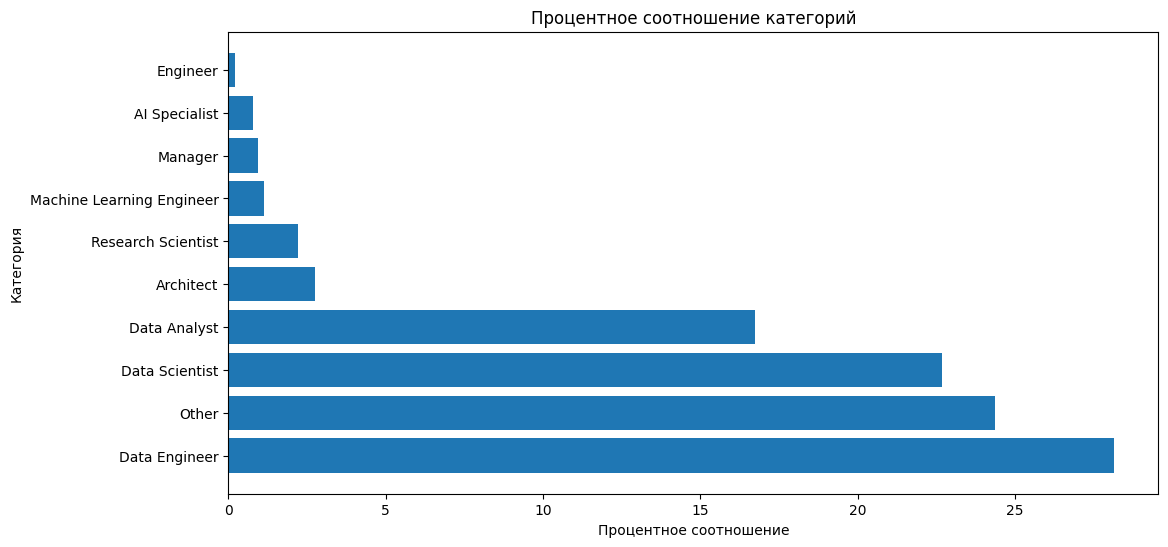

In [19]:
# Выводим график новых категорий должностей
value_counts = df['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Процентное соотношение')
ax.set_ylabel('Категория')
ax.set_title('Процентное соотношение категорий')
plt.show()

- Категория "Data Engineering" имеет самую большую долю, с процентом близким к 30%.
- Категория 'Ohter' профессий не вошедших в категории составляют почти 25%
- Категория "Data Science" следует за ней с процентом, около 23%.
- Категория "Data Analyst" представлена примерно 16%.
- Категории "Architect", "Research Scientist", "Machine Learning Engineer", "Manager", "AI Specialist", "Engineer" занимают наименьший процент,находятся ниже 5%.

In [20]:
df['salary'].value_counts()

salary
100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: count, Length: 815, dtype: int64

In [21]:
df['salary_currency'].value_counts()

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

In [22]:
df['salary_in_usd'].value_counts()

salary_in_usd
100000    99
150000    98
120000    91
160000    84
130000    82
          ..
234100     1
223800     1
172100     1
232200     1
94665      1
Name: count, Length: 1035, dtype: int64

In [23]:
# Выборка зарплатных признаков 
salary_features = ['salary', 'salary_currency', 'salary_in_usd']
df[salary_features]

,salary,salary_currency,salary_in_usd
0,80000,EUR,85847
1,30000,USD,30000
2,25500,USD,25500
3,175000,USD,175000
4,120000,USD,120000
...,...,...,...
3750,412000,USD,412000
3751,151000,USD,151000
3752,105000,USD,105000
3753,100000,USD,100000


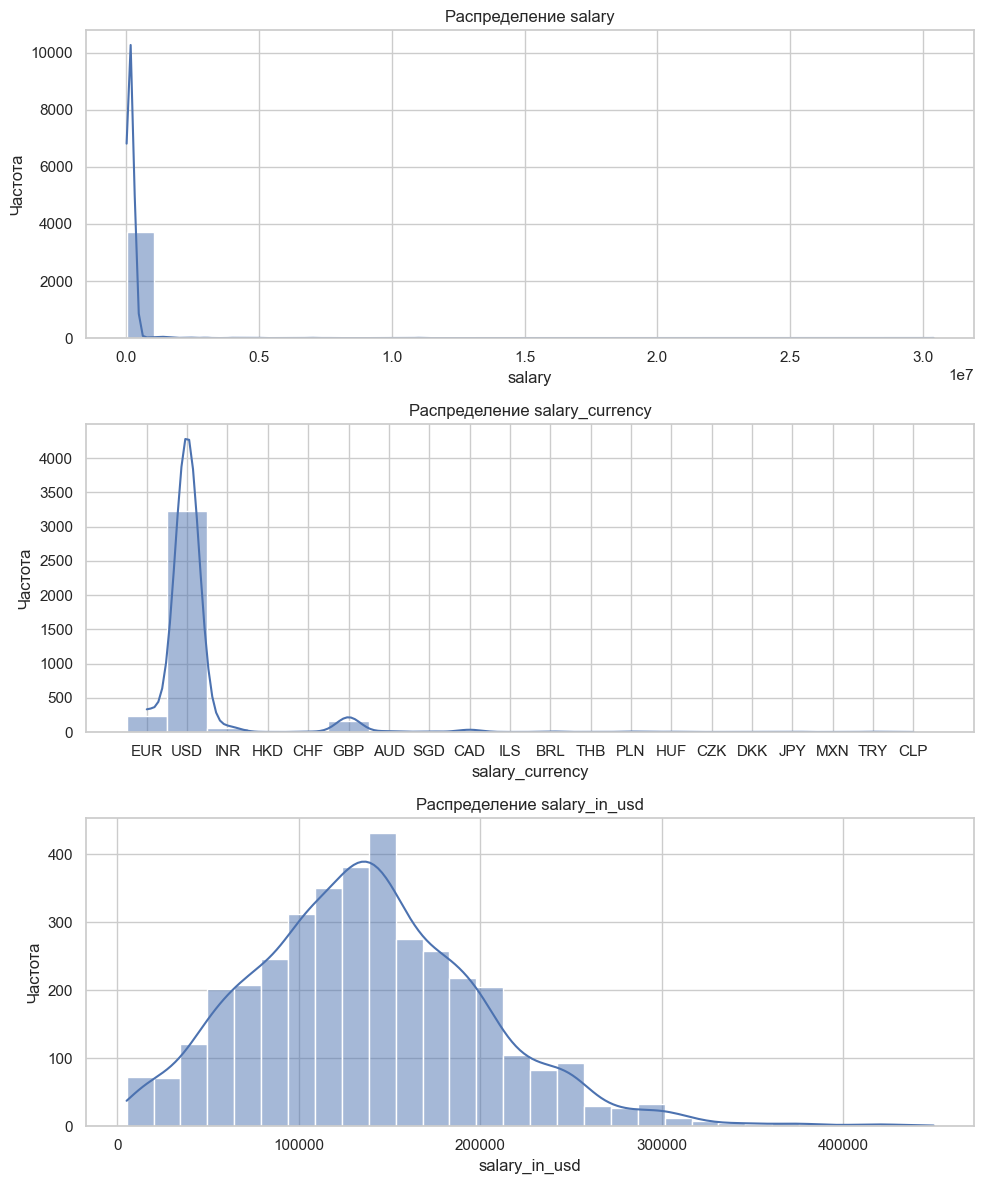

In [24]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['salary', 'salary_currency', 'salary_in_usd']

plt.figure(figsize=(10, 12))

for i, column in enumerate(selected_columns):
    plt.subplot(3, 1, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Данный код учитывает уровень инфляции за разные годы

In [25]:
# Словари с инфляционными ставками для США и глобальными ставками по года
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

# Функция для корректировки зарплаты с учетом инфляции
        # Проверяем валюту и выбираем соответствующую инфляционную ставку
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]
        # Корректируем зарплату с учетом инфляции
        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

# Применяем функцию adjust_salary к каждой строке DataFrame и сохраняем результаты в новой колонке 'adjusted_salary'
df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

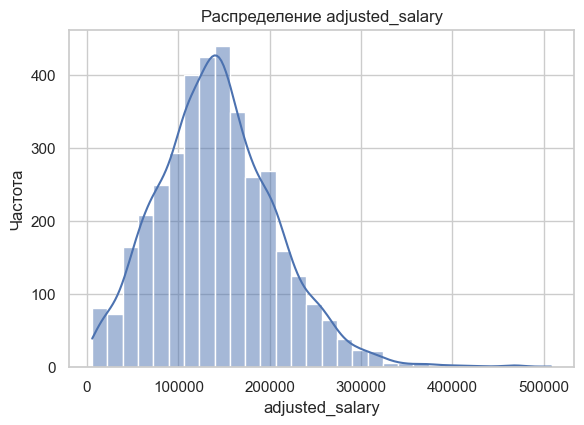

In [26]:
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
selected_columns = ['adjusted_salary']

plt.figure(figsize=(6, 12))

for i, column in enumerate(selected_columns):
    plt.subplot(3, 1, i + 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [27]:
df['employee_residence'].value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

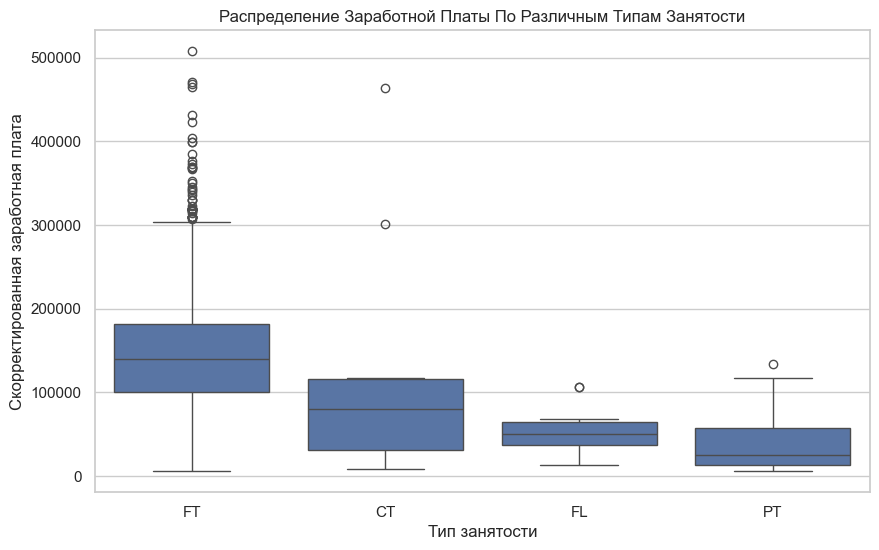

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='adjusted_salary')
plt.title('Распределение Заработной Платы По Различным Типам Занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Скорректированная заработная плата')
plt.show()

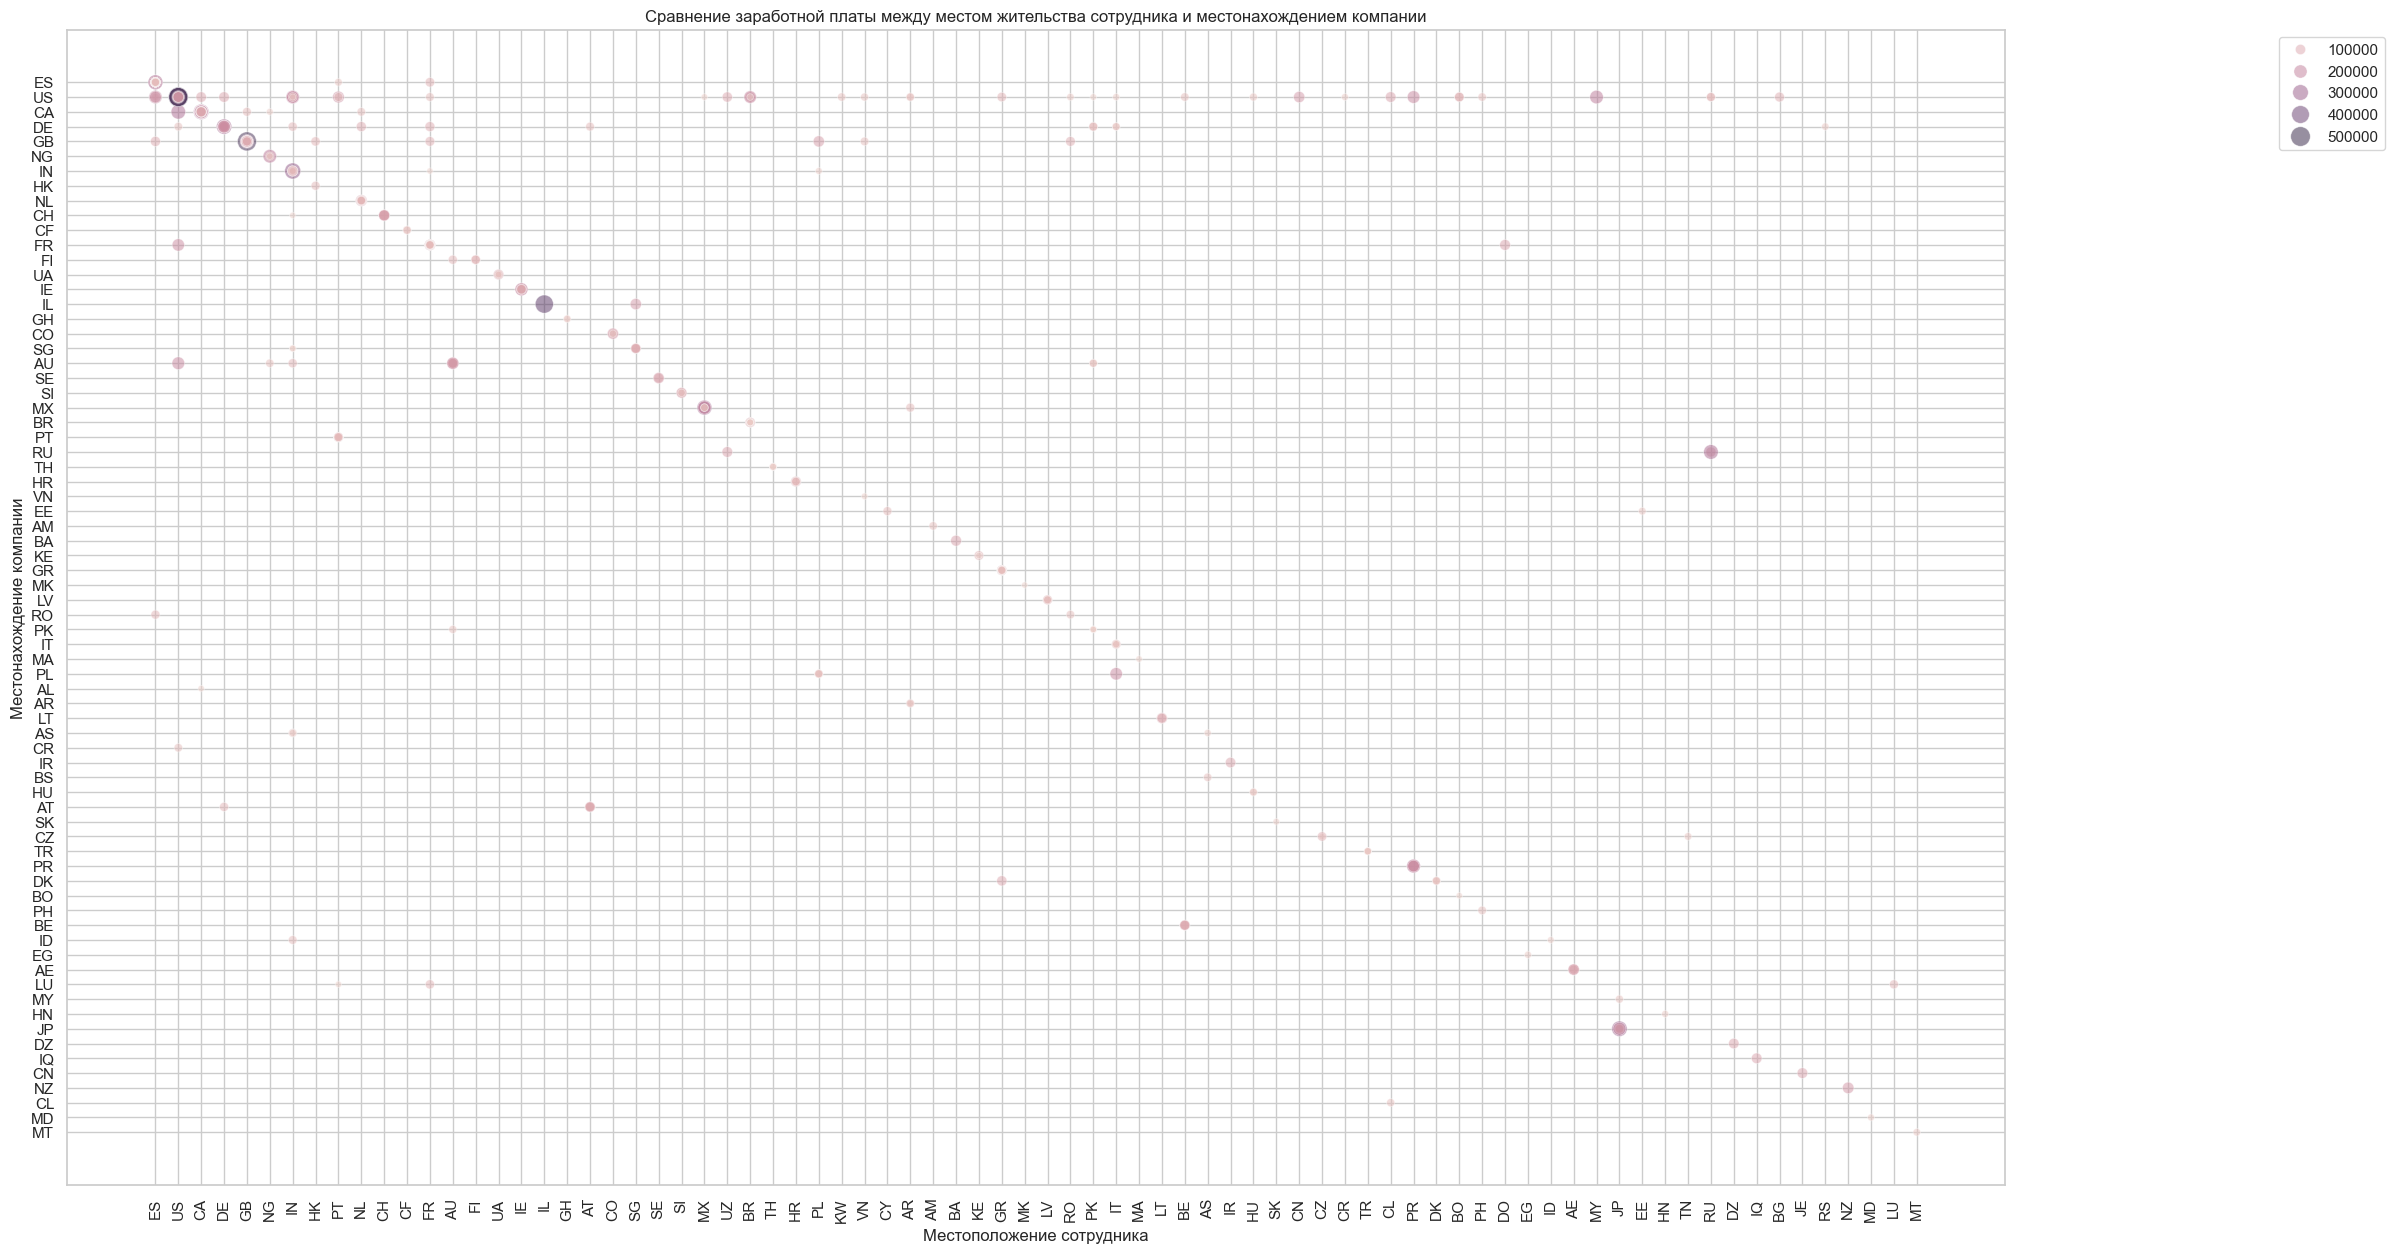

In [29]:
plt.figure(figsize=(25, 15))
sns.scatterplot(data=df, x='employee_residence', y='company_location', hue='adjusted_salary', size='adjusted_salary',\
                sizes=(20, 200), alpha=0.5)
plt.title('Сравнение заработной платы между местом жительства сотрудника и местонахождением компании')
plt.xlabel('Местоположение сотрудника')
plt.ylabel('Местонахождение компании')
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [30]:
df['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

Больше всего человек работает в офисе и лишь небольшая часть работает гибридно.

In [31]:
df['company_location'].value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

In [32]:
df['company_size'].value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

Кодировка категориальные признаки

In [33]:
# Создание экземпляра TfidfVectorizer
vectorizer = TfidfVectorizer()

# Преобразование документов в TF-IDF векторы
tfidf_matrix = vectorizer.fit_transform(df['job_category'])
# Просмотр результатов
print(tfidf_matrix)

# Для получения словаря терминов
print(vectorizer.get_feature_names_out())

  (0, 8)	1.0
  (1, 6)	0.6794554655569369
  (1, 5)	0.6794554655569369
  (1, 4)	0.27691251443301046
  (2, 6)	0.6794554655569369
  (2, 5)	0.6794554655569369
  (2, 4)	0.27691251443301046
  (3, 3)	0.50325368407339
  (3, 10)	0.8641387211938606
  (4, 3)	0.50325368407339
  (4, 10)	0.8641387211938606
  (5, 8)	1.0
  (6, 8)	1.0
  (7, 3)	0.50325368407339
  (7, 10)	0.8641387211938606
  (8, 3)	0.50325368407339
  (8, 10)	0.8641387211938606
  (9, 3)	0.50325368407339
  (9, 10)	0.8641387211938606
  (10, 3)	0.50325368407339
  (10, 10)	0.8641387211938606
  (11, 3)	0.4469281850243177
  (11, 1)	0.8945698393255103
  (12, 3)	0.4469281850243177
  (12, 1)	0.8945698393255103
  :	:
  (3739, 4)	0.8472857565958778
  (3739, 3)	0.5311373143262965
  (3740, 8)	1.0
  (3741, 3)	0.50325368407339
  (3741, 10)	0.8641387211938606
  (3742, 3)	0.50325368407339
  (3742, 10)	0.8641387211938606
  (3743, 4)	0.8472857565958778
  (3743, 3)	0.5311373143262965
  (3744, 8)	1.0
  (3745, 8)	1.0
  (3746, 3)	0.50325368407339
  (3746, 10)	0

In [34]:
# # Создание DataFrame для TF-IDF векторов:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# # Конкатенируем исходный DataFrame с новым DataFrame векторов TF-IDF
df = pd.concat([df, tfidf_df], axis=1).drop('job_category', axis=1)

In [35]:
df.drop(['job_title'], axis=1, inplace=True)

In [36]:
selected_columns = df.loc[:, ['company_size', 'experience_level']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in selected_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)

Кодировка для company_size: {'L': 0, 'M': 1, 'S': 2}
Кодировка для experience_level: {'EN': 0, 'EX': 1, 'MI': 2, 'SE': 3}


In [37]:
df.drop(['company_size', 'experience_level'], axis=1, inplace=True)

In [38]:
# Вычисляем количество встречаемости каждого уникального значения в колонке
location_counts = df['company_location'].value_counts()

# Закодируем 'company_location' на основе количества встречаемости
df['location_encoded'] = df['company_location'].map(location_counts)

df.drop(['company_location'], axis = 1, inplace=True)

In [39]:
# Вывод DataFrame
display(df)

,work_year,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,adjusted_salary,ai,analyst,...,learning,machine,manager,other,research,scientist,specialist,company_size_encoded,experience_level_encoded,location_encoded
0,2023,FT,80000,EUR,85847,ES,100,85847.000000,0.0,0.00000,...,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,3,77
1,2023,CT,30000,USD,30000,US,100,30000.000000,0.0,0.00000,...,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040
2,2023,CT,25500,USD,25500,US,100,25500.000000,0.0,0.00000,...,0.679455,0.679455,0.0,0.0,0.0,0.000000,0.0,2,2,3040
3,2023,FT,175000,USD,175000,CA,100,175000.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87
4,2023,FT,120000,USD,120000,CA,100,120000.000000,0.0,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,1,3,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,FT,412000,USD,412000,US,100,465053.312718,0.0,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,0,3,3040
3751,2021,FT,151000,USD,151000,US,100,168373.305000,0.0,0.00000,...,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0,2,3040
3752,2020,FT,105000,USD,105000,US,100,118520.868532,0.0,0.00000,...,0.000000,0.000000,0.0,0.0,0.0,0.864139,0.0,2,0,3040
3753,2020,CT,100000,USD,100000,US,100,112877.017650,0.0,0.89457,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0,0,3040


In [40]:
# Определение категориальных и числовых колонок
categorical_columns = ['employment_type', 'remote_ratio']
numerical_columns = ['adjusted_salary']

In [41]:
# Преобразование категориальных переменных в дамми-переменные
# Используем pd.get_dummies для создания дамми-переменных из категориальных колонок
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [42]:
# Масштабирование числовых переменных
# Инициализация StandardScaler для стандартизации данных
scaler = StandardScaler()

# Масштабируем числовые переменные и преобразуем их в DataFrame
scaled_numerical = scaler.fit_transform(df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [43]:
# Удаление оригинальных числовых колонок из дамми-переменных
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Объединение дамми-переменных и масштабированных числовых переменных
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

# Удаляем колонки, которые не нужны для анализа (work_year, salary, salary_in_usd)
processed_df = processed_df.drop(['work_year', 'salary', 'salary_in_usd'], axis=1)

In [44]:
# Удаление колонок с типом 'object'
# Создаем копию DataFrame без колонок с типом 'object' (например, текстовые данные)
processed_df = processed_df.drop(processed_df.select_dtypes(include = 'object'), axis = 1)

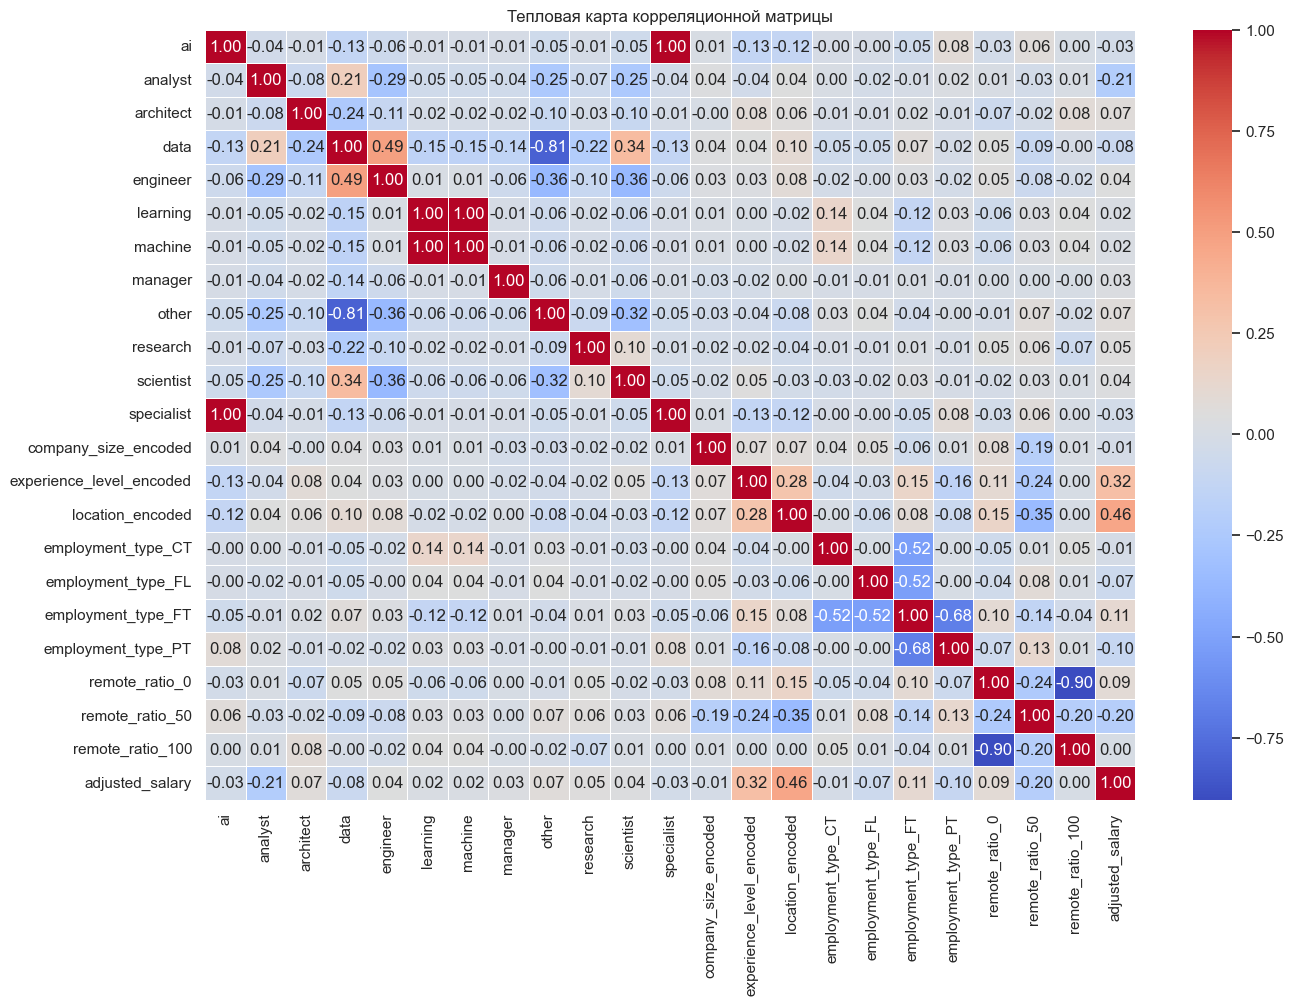

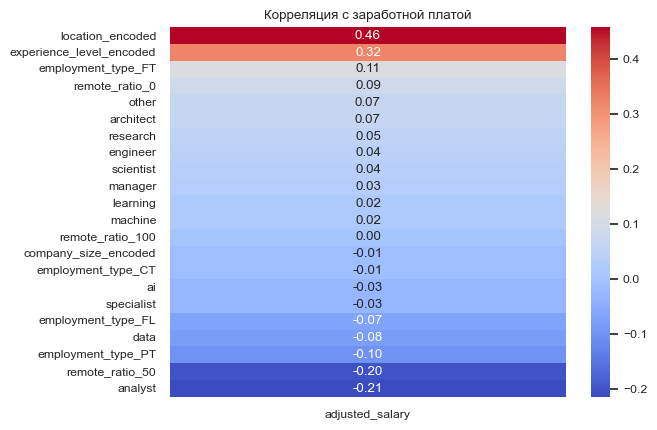

In [45]:
# Вычисляем корреляционную матрицу для обработанного DataFrame
correlation_matrix = processed_df.corr()

# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = processed_df.corr()
target_corr = corr['adjusted_salary'].drop('adjusted_salary')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с заработной платой')
plt.show()

Положительные корреляции показывают, что между заработной платой и параметрами существует прямая, чем выше связь тем выше зарплата. Отрицательные значения говорят, что между параметрами обратная связь, чем ниже зарплата тем ниже значение. 

Наиболее значемые положительные:
location_encoded — место нахождения главного офиса, имеет самую большу корреляцию с заработной платой 0.46
experience_level_ecoded — Уровень опыта сотрудника, имеет не менее большую корреляцию с заработной платой 0.32
employment_type_FT — Характер трудового договора (Полный рабочий день), так же имеет положительную корреляцию с заработной платой выше 0.10 и состовляет 0.11

По итогу получается, что работа в главном офисе, высокий уровень опыта сотрудника(трудовой стаж) а так же тип трудового договора в данном случае полный рабочий день, оказывают положительное коррелицеонное влияние на уровень заработной платы.

Наиболее значемые отрицательные:
analyst — Должность аналитик имеет самый высокий отрицательный уровень корреляции заработной платы в -0.21
remote_ratio_50 — Доля работы выполняемой удалённо, при данном типе работы тоже имеет отрицательный тип корреляции по заработной плате -0.20
employment_type_FL — Характер трудового договора (Фриланс) данный тип тоже имеет отрицательную корреляцию в пределах -0.10

По итогу получается, что работающией на фрилансе с частично удалённой работой и аналитики имеют самую низкую отрицательную корреляцию по уровню заработной платы.

##### 2. Построение модели линейной регрессии:

— Разделить данные на обучающую и тестовую выборки.

— Построить модель линейной регрессии для прогнозирования заработной платы.

— Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.

— Проанализировать значимость признаков и мультиколлинеарность.

In [46]:
# Определение независимых и зависимых переменных
X = processed_df.drop(["adjusted_salary"], axis=1) # Независимые переменные
y = processed_df['adjusted_salary']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание значений
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оценка качества модели
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("Тренировочный набор:")
print(f'MSE: {mse_train}, MAE: {mae_train}, R2: {r2_train}')
print("Тестовый набор:")
print(f'MSE: {mse_test}, MAE: {mae_test}, R2: {r2_test}')

Тренировочный набор:
MSE: 0.6843282923285279, MAE: 0.6219111046012209, R2: 0.31827653955892055
Тестовый набор:
MSE: 0.6829584868708372, MAE: 0.6326313901456463, R2: 0.30541649393802706


Низкие значения MSE указывают на хорошую производительность модели а так же они почти одинаковые, что может указывать на отсутствие сильного переобучения. Значения MAE также близки, что говорит о том, что модель имеет схожую производительность на тренировочных и тестовых данных. R2 значения ниже 0.50 и состовляет 0.30, что свидетельсвтует о низкой объясняющей способности модели текущая модель объясняет около 30% вариации в данных.


##### 3. Построение модели дерева решений:

— Построить модель дерева решений для прогнозирования заработной платы.

— Оценить качество модели с помощью метрик RMSE и R-квадрат.

— Подберите гиперпараметры для модели дерево решений

— Визуализировать дерево решений.

DecisionTreeRegressor MSE: 0.8101470311273637
DecisionTreeRegressor RMSE: 0.8101470311273637
DecisionTreeRegressor R2: 0.3324898873823934
Лучшие параметры: {'max_depth': 5, 'min_samples_split': 20}
Best DecisionTreeRegressor MSE: 0.6336255101297642
Best DecisionTreeRegressor RMSE: 0.7960059736771855
Best DecisionTreeRegressor R2: 0.35558919492646746


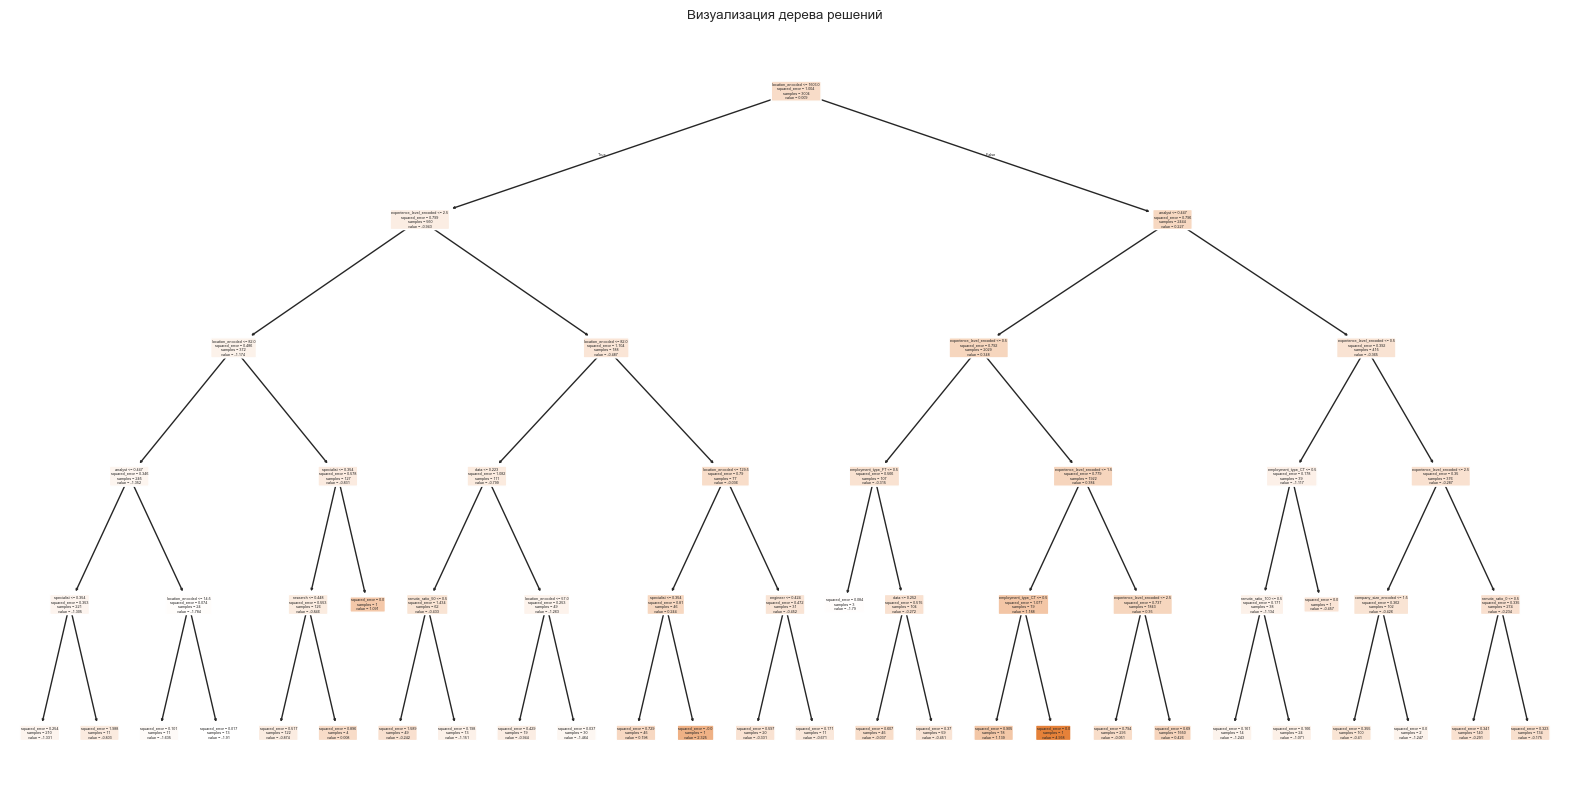

In [47]:
# Создание и обучение модели дерева решений
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
Tree_reg_y_pred = dt_regressor.predict(X_test)

# Вычисление метрик MSE RMSE и R2
Tree_reg_mse = mean_squared_error(y_test, Tree_reg_y_pred)
Tree_reg_rmse = np.sqrt(mean_squared_error(y_test, Tree_reg_y_pred))
Tree_reg_r2 = r2_score(y_test, Tree_reg_y_pred)

# Вывод результатов
print(f'DecisionTreeRegressor MSE: {Tree_reg_rmse}')
print(f'DecisionTreeRegressor RMSE: {Tree_reg_rmse}')
print(f'DecisionTreeRegressor R2: {Tree_reg_r2}')

# Определение параметров для подбора
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Подбор гиперпараметров с помощью GridSearchCV
Tree_reg_grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
Tree_reg_grid_search.fit(X_train, y_train)

# Лучшие параметры
Tree_reg_grid_search_best_params = Tree_reg_grid_search.best_params_
print(f'Лучшие параметры: {Tree_reg_grid_search_best_params}')

# Создание и обучение дерева решений с лучшими параметрами
Tree_reg_best_regressor = DecisionTreeRegressor(**Tree_reg_grid_search_best_params, random_state=42)
Tree_reg_best_regressor.fit(X_train, y_train)

# Прогнозирование на тестовой выборке с лучшей моделью
Tree_reg_params_y_pred_best = Tree_reg_best_regressor.predict(X_test)

# Вычисление метрик MSE RMSE и R2 для лучшей модели
Tree_best_reg_fores = mean_squared_error(y_test, Tree_reg_params_y_pred_best)
Tree_best_reg_rmse = np.sqrt(mean_squared_error(y_test, Tree_reg_params_y_pred_best))
Tree_best_reg_r2 = r2_score(y_test, Tree_reg_params_y_pred_best)

# Вывод результатов
print(f'Best DecisionTreeRegressor MSE: {Tree_best_reg_fores}')
print(f'Best DecisionTreeRegressor RMSE: {Tree_best_reg_rmse}')
print(f'Best DecisionTreeRegressor R2: {Tree_best_reg_r2}')


# Визуализация дерева решений
plt.figure(figsize=(20, 10))  # Уменьшите размер, чтобы лучше отобразить
plot_tree(Tree_reg_best_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title('Визуализация дерева решений')
plt.show()

DecisionTreeRegressor демострирует некоторое улучшение по сравнению с линейной регресией в частьности R2 лучше на 5%, лучшие модель отрабатывает при  {'max_depth': 5, 'min_samples_split': 20}

##### 4. Построение ансамблевой модели:

— Построить ансамблевую модель, используя Random Forest и Boosting.

— Сравнить качество ансамблевой модели с отдельными моделями.

— Оценить важность признаков в ансамблевой модели.


In [48]:
# Создание и обучение ансамбля RandomForest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Предсказания
forest_predictions = forest_model.predict(X_test)

# Расчет метрик
fores_mse = mean_squared_error(y_test, forest_predictions)
fores_rmse = np.sqrt(mean_squared_error(y_test, forest_predictions))
forest_r2 = r2_score(y_test, forest_predictions)

# Вывод результата
print(f"RandomForestRegressor MSE: {fores_mse}")
print(f"RandomForestRegressor RMSE: {fores_rmse}")
print(f"R2 для RandomForestRegressor: {forest_r2}")

RandomForestRegressor MSE: 0.6436680132101507
RandomForestRegressor RMSE: 0.8022892328893306
R2 для RandomForestRegressor: 0.3453757527725051


In [49]:
# Создание и обучение ансамбля GradientBoostingRegressor
boosting_model = GradientBoostingRegressor(random_state=42)
boosting_model.fit(X_train, y_train)

# Предсказания
boosting_predictions = boosting_model.predict(X_test)

# Расчет метрик
boosting_mse = mean_squared_error(y_test, boosting_predictions)
boosting_rmse = np.sqrt(mean_squared_error(y_test, boosting_predictions))
boosting_r2 = r2_score(y_test, boosting_predictions)

# Вывод результата
print(f"GradientBoostingRegressor MSE: {boosting_mse}")
print(f"GradientBoostingRegressor RMSE: {boosting_rmse}")
print(f"R2 для GradientBoostingRegressor: {boosting_r2}")

GradientBoostingRegressor MSE: 0.6350780617877934
GradientBoostingRegressor RMSE: 0.7969178513421526
R2 для GradientBoostingRegressor: 0.35411191857253765


In [50]:
# Создание и обучение модели XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Прогнозирование
xgb_pred = xgb_model.predict(X_test)

# Расчет метрик
xgb_mse = mean_squared_error(y_test, xgb_pred)  
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)

# Вывод результата
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost RMSE: {xgb_rmse}")
print(f"R2 для XGBoost: {xgb_r2}")

XGBoost MSE: 0.6524447782484922
XGBoost RMSE: 0.8077405389408732
R2 для XGBoost: 0.3364495934972249


In [51]:
# Сравнение моделей
print("Сравнение моделей:")
print(f"Random Forest - RMSE: {fores_rmse}, R2: {forest_r2}")
print(f"Gradient Boosting - RMSE: {boosting_rmse}, R2: {boosting_r2}")
print(f"XGBoost - RMSE: {xgb_rmse}, R2: {xgb_r2}")

Сравнение моделей:
Random Forest - RMSE: 0.8022892328893306, R2: 0.3453757527725051
Gradient Boosting - RMSE: 0.7969178513421526, R2: 0.35411191857253765
XGBoost - RMSE: 0.8077405389408732, R2: 0.3364495934972249


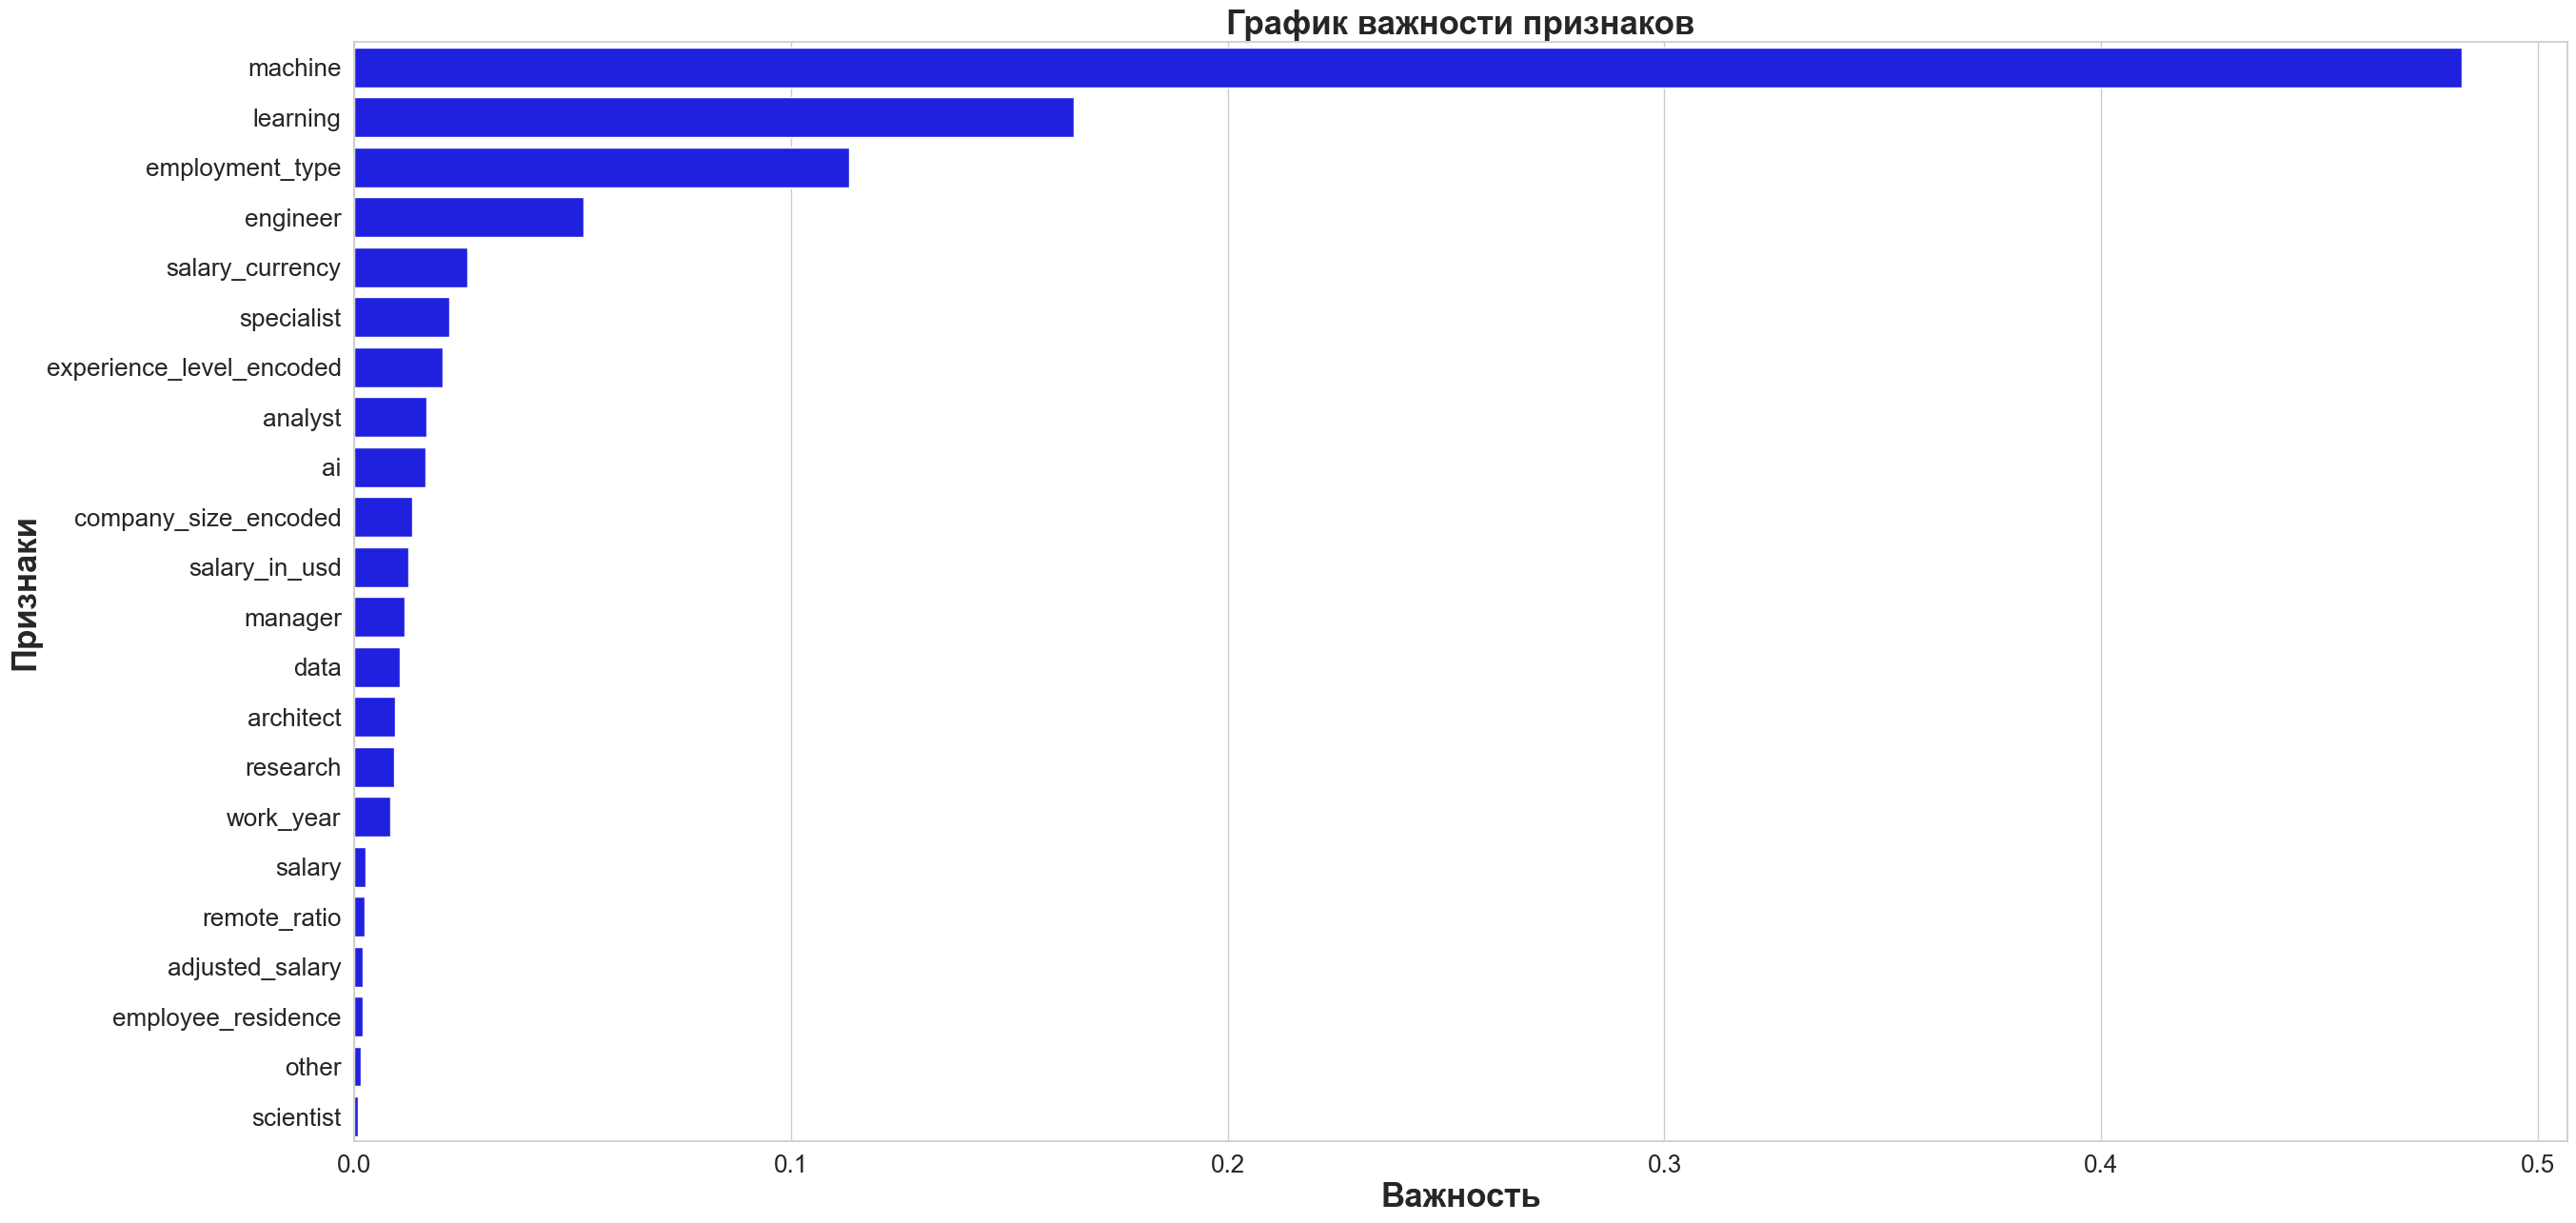

None

,Features,Gini-Importance
0,machine,0.482549
1,learning,0.164689
2,employment_type,0.113361
3,engineer,0.052493
4,salary_currency,0.025885
5,specialist,0.021732
6,experience_level_encoded,0.020243
7,analyst,0.016582
8,ai,0.016415
9,company_size_encoded,0.013293


In [52]:
# Создание словаря для хранения важностей признаков
feats = {}

# Заполнение словаря парами "признак - важность" из модели RandomForest
for feature, importance in zip(df.columns, forest_model.feature_importances_):
    feats[feature] = importance

# Создание DataFrame из словаря
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})

# Сортировка DataFrame по важности в порядке убывания
importances = importances.sort_values(by='Gini-Importance', ascending=False)

# Сброс индексов для упрощения работы с DataFrame
importances = importances.reset_index()

# Переименование колонки индекса в 'Features'
importances = importances.rename(columns={'index': 'Features'})

# Настройка стиля графика с помощью Seaborn
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)

# Построение столбчатой диаграммы важности признаков
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='blue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('График важности признаков', fontsize=25, weight = 'bold')
display(plt.show())

# Вывод DataFrame с важностями признаков
display(importances)

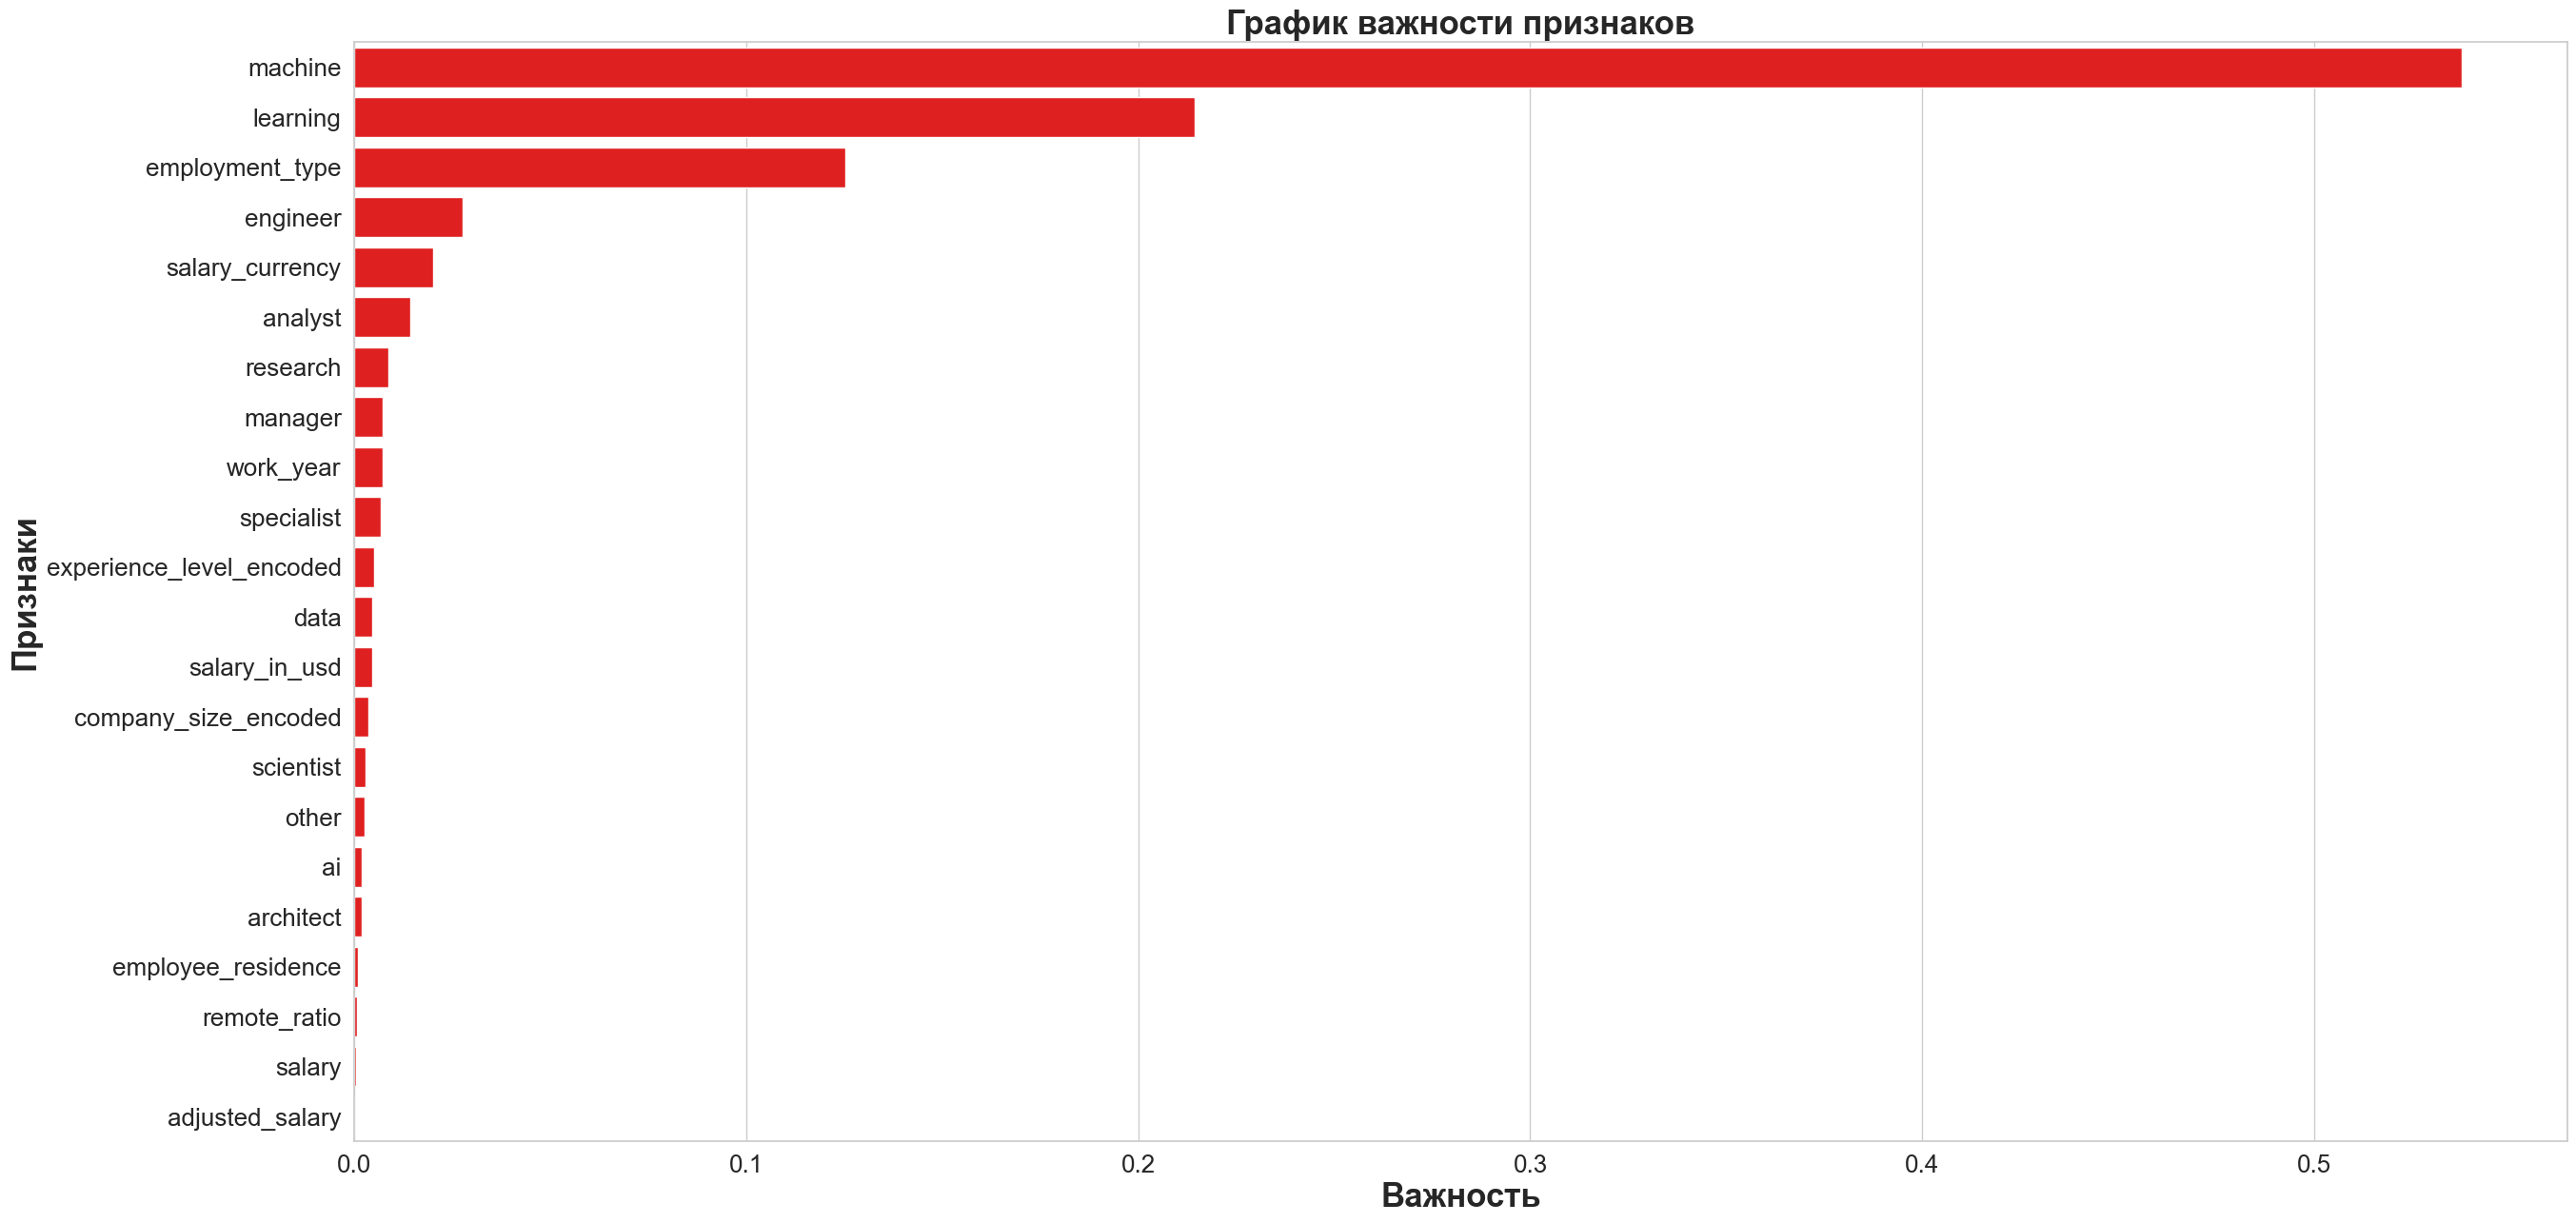

None

,Features,Gini-Importance
0,machine,0.537638
1,learning,0.214372
2,employment_type,0.125292
3,engineer,0.027595
4,salary_currency,0.020294
5,analyst,0.014351
6,research,0.008719
7,manager,0.007412
8,work_year,0.007258
9,specialist,0.006866


In [53]:
# Создание словаря для хранения важностей признаков
feats = {}

# Заполнение словаря парами "признак - важность" из модели GradientBoostingRegressor
for feature, importance in zip(df.columns, boosting_model.feature_importances_):
    feats[feature] = importance

# Создание DataFrame из словаря
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})

# Сортировка DataFrame по важности в порядке убывания
importances = importances.sort_values(by='Gini-Importance', ascending=False)

# Сброс индексов для упрощения работы с DataFrame
importances = importances.reset_index()

# Переименование колонки индекса в 'Features'
importances = importances.rename(columns={'index': 'Features'})

# Настройка стиля графика с помощью Seaborn
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)

# Построение столбчатой диаграммы важности признаков
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='red')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('График важности признаков', fontsize=25, weight = 'bold')
display(plt.show())

# Вывод DataFrame с важностями признаков
display(importances)

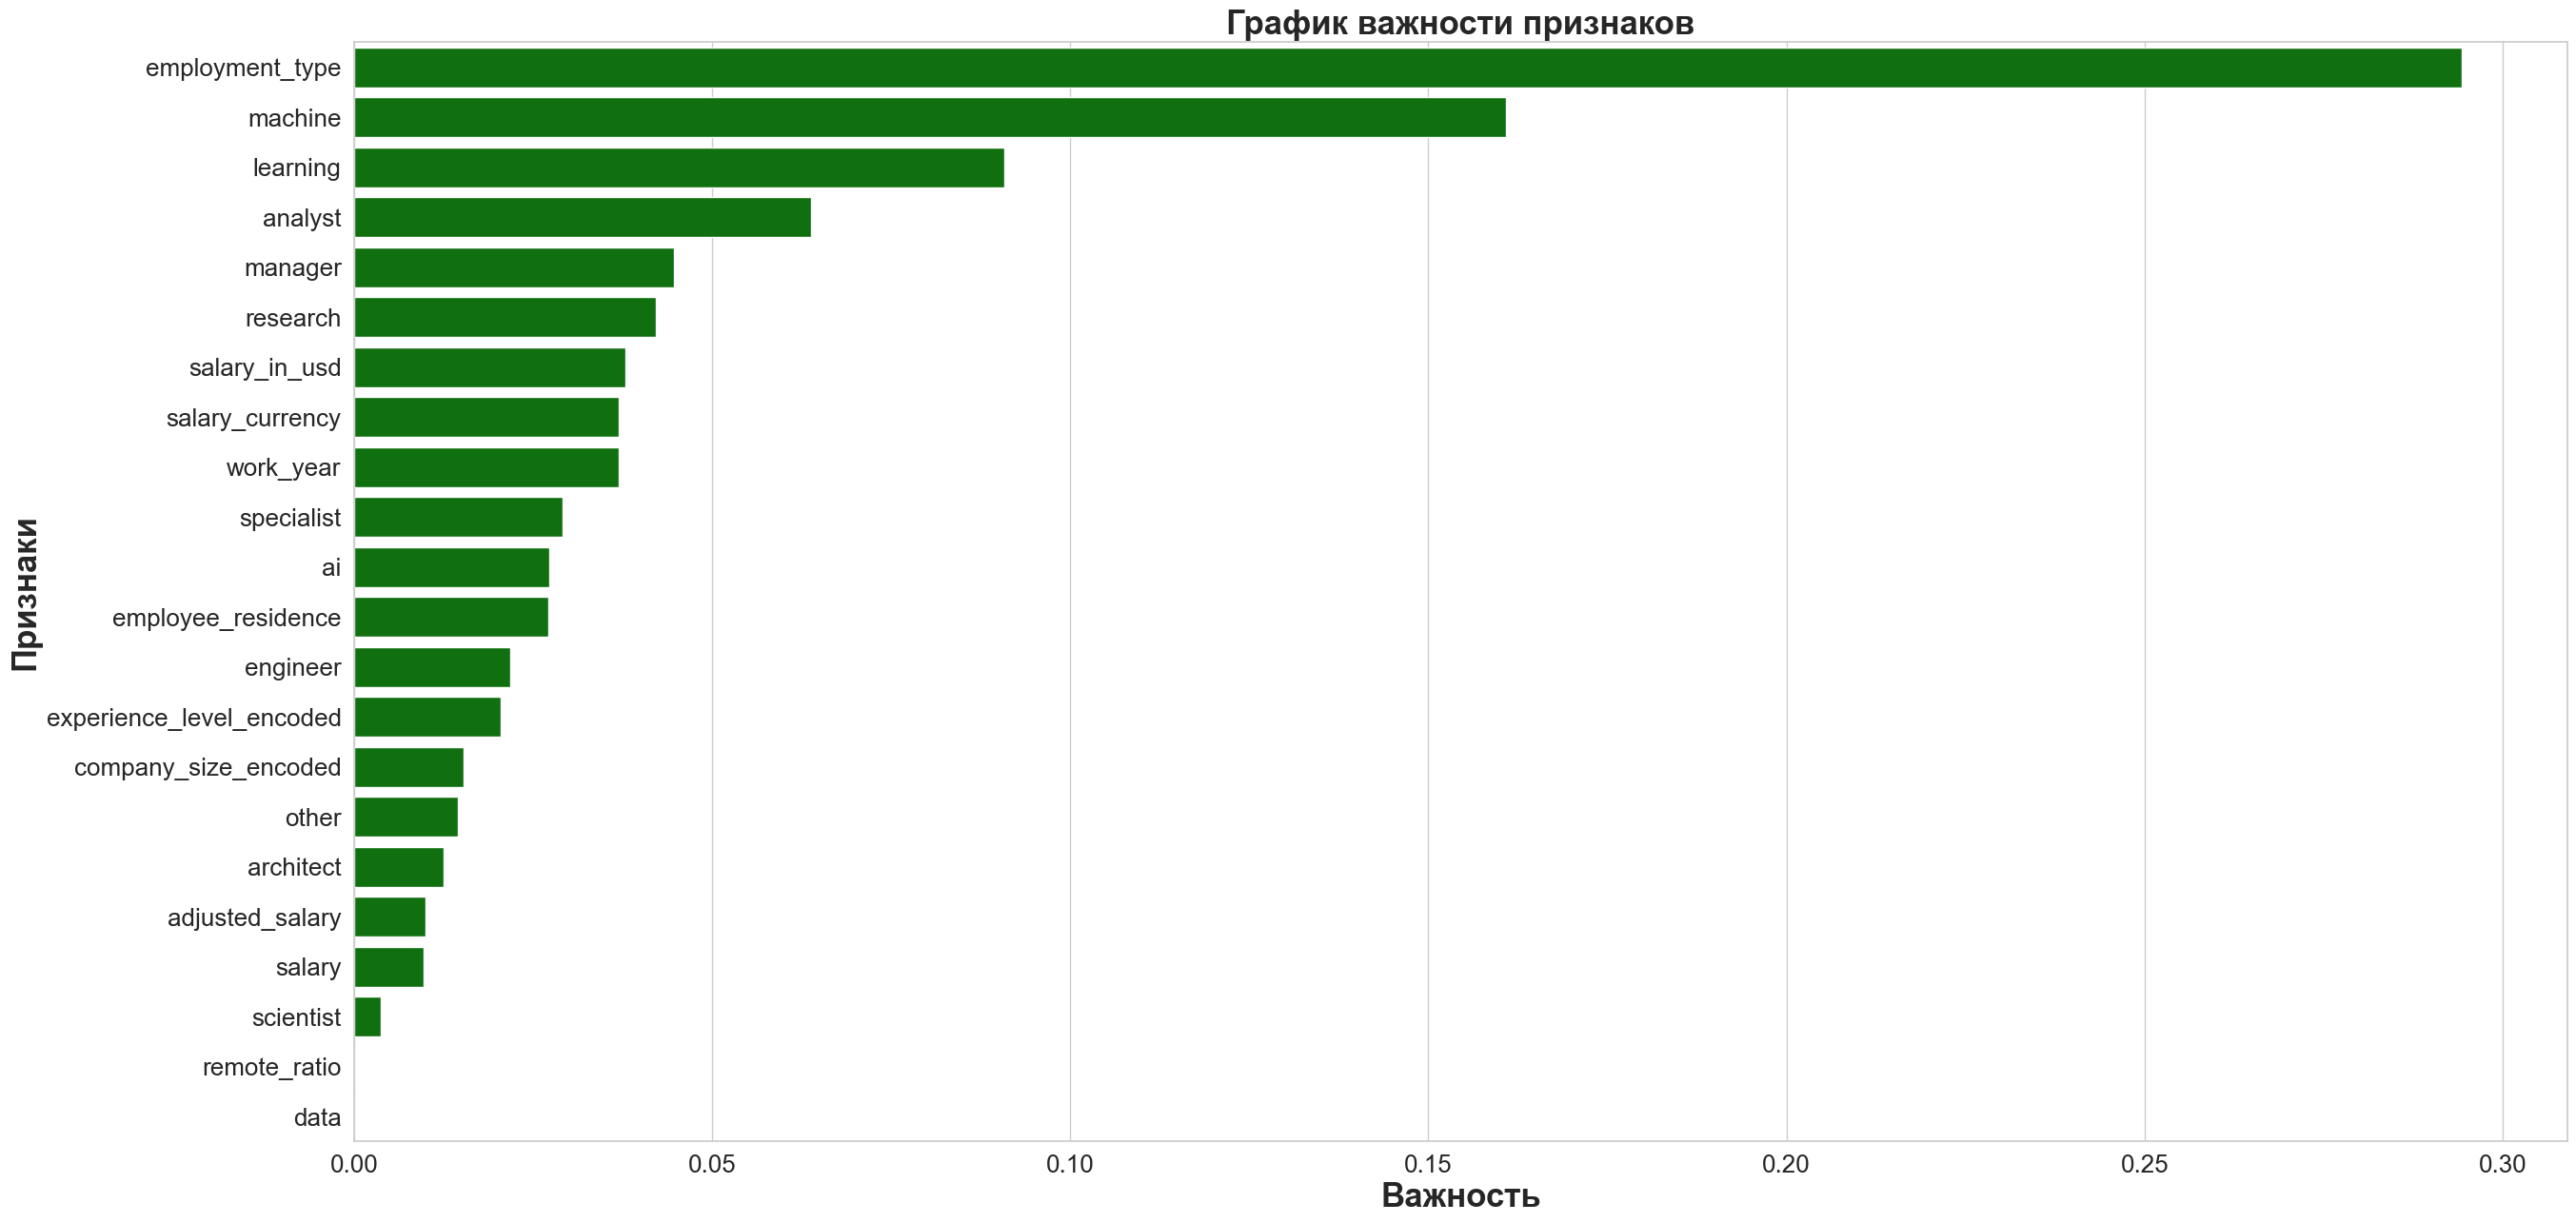

None

,Features,Gini-Importance
0,employment_type,0.294319
1,machine,0.160820
2,learning,0.090786
3,analyst,0.063792
4,manager,0.044636
5,research,0.042107
6,salary_in_usd,0.037934
7,salary_currency,0.037012
8,work_year,0.036909
9,specialist,0.029141


In [54]:
# Создание словаря для хранения важностей признаков
feats = {}

# Заполнение словаря парами "признак - важность" из модели XGBoost
for feature, importance in zip(df.columns, xgb_model.feature_importances_):
    feats[feature] = importance

# Создание DataFrame из словаря
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})

# Сортировка DataFrame по важности в порядке убывания
importances = importances.sort_values(by='Gini-Importance', ascending=False)

# Сброс индексов для упрощения работы с DataFrame
importances = importances.reset_index()

# Переименование колонки индекса в 'Features'
importances = importances.rename(columns={'index': 'Features'})

# Настройка стиля графика с помощью Seaborn
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)

# Построение столбчатой диаграммы важности признаков
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='green')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('График важности признаков', fontsize=25, weight = 'bold')
display(plt.show())

# Вывод DataFrame с важностями признаков
display(importances)

##### 5. Понижение размерности:

— Применить Principal Component Analysis (PCA) для снижения размерности данных.

— Построить модель линейной регрессии с использованием данных, полученных после PCA.

— Сравнить качество модели с использованием исходных данных.

In [67]:
# Прогнозирование и оценка
orig_y_pred = model.predict(X_test)
orig_mse = mean_squared_error(y_test, orig_y_pred)
orig_rmse = np.sqrt(mean_squared_error(y_test, orig_y_pred))
orig_mae = mean_absolute_error(y_test, orig_y_pred)
r2_orig = r2_score(y_test, orig_y_pred)

# Применение PCA для снижения размерности
pca = PCA(n_components=0.95)  # Сохраняем 95% дисперсии
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Обучение модели линейной регрессии на данных после PCA
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

# Прогнозирование и оценка
y_pred_pca = lin_reg_pca.predict(X_test_pca)
pca_mse = mean_squared_error(y_test, y_pred_pca)
pca_rmse = np.sqrt(mean_squared_error(y_test, y_pred_pca))
pca_mae = mean_absolute_error(y_test, y_pred_pca)
pca_r2 = r2_score(y_test, y_pred_pca)

# Сравнение качества моделей
print(f"Качество модели на исходных данных:")
print(f"MSE: {orig_mse},  RMSE: {orig_rmse}, MAE: {orig_mae}, R2 {r2_orig}")
print(f"Качество модели на данных после PCA:")
print(f"MSE: {pca_mse}, RMSE: {pca_rmse}, MAE: {pca_mae}, R2: {pca_r2}")

Качество модели на исходных данных:
MSE: 0.6829584868708372,  RMSE: 0.8264130243835931, MAE: 0.6326313901456463, R2 0.30541649393802706
Качество модели на данных после PCA:
MSE: 0.7761659387556489, RMSE: 0.8810028029215622, MAE: 0.6842612965622443, R2: 0.2106225057735619


После понижения размерности данных c использование РСА MSE и RMSE увеличились, что говорит о снижении предсказываемости модели, MAE так же увеличилась, что говорит о предсказания стали менее точными. Метрика R2 понизилась это говорит о том, что применение алгоритма РСА не повлияло на улучшение модели линейной регрессии и о недостаче данных.

##### 6. Кластеризация:

— Применить метод K-Means для кластеризации данных по заработной плате.

— Определить оптимальное количество кластеров.

— Проанализировать характеристики полученных кластеров.

— Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.

— Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means.

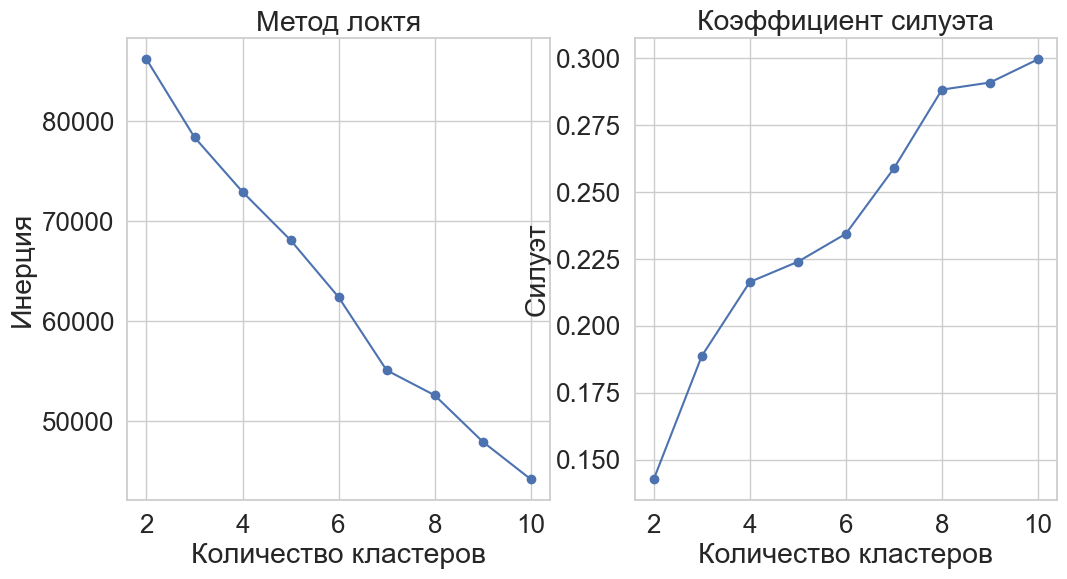

        adjusted_salary      
                   mean count
cluster                      
0             -0.478875   629
1              0.138818  1127
2              0.076428   935
3              0.068895  1064


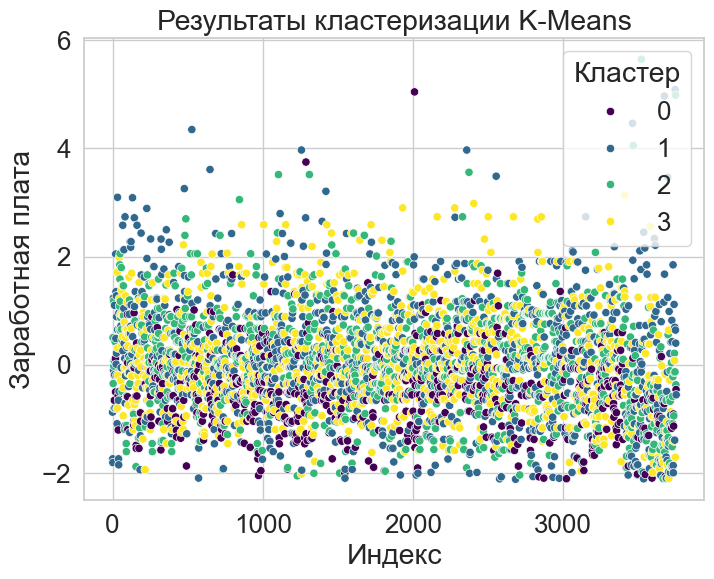


K-Means
_____________________________________________

Силуэт 0.216
Variance Ratio Criterion 358.747
rand_score = 0.7388385721896643 

 2774.3388385721896 из 3755 предсказано верно 



c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


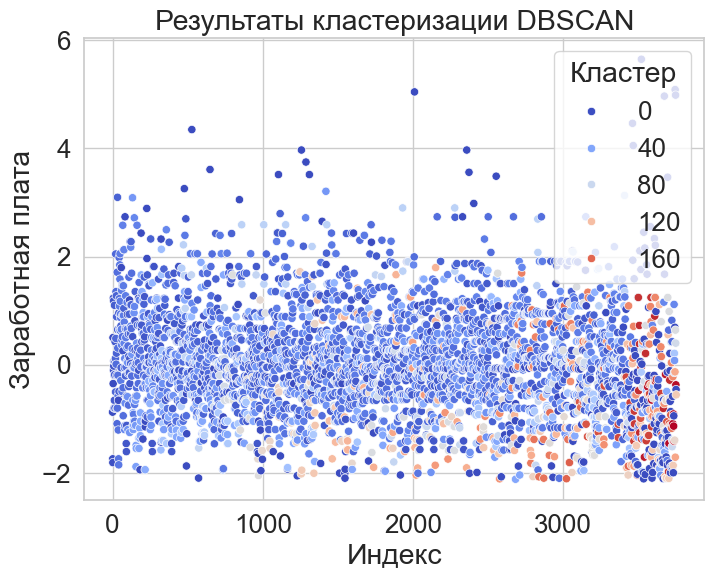

DBSCAN
_____________________________________________

Силуэт 0.493
Variance Ratio Criterion 35.485
rand_score = 0.9535935392837963 

 3580.743740010655 из 3755 предсказано верно 



c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [ ]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(processed_df)

# Определение оптимального количества кластеров
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Визуализация метода локтя
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

# Визуализация коэффициента силуэта
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.show()

# Применение K-Means для кластеризации
optimal_k = 4  # Например, выберем 4 кластера на основе анализа
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
processed_df['cluster'] = kmeans.fit_predict(X_scaled)

# Анализ характеристик полученных кластеров
cluster_analysis = processed_df.groupby('cluster').agg({'adjusted_salary': ['mean', 'count']})
print(cluster_analysis)

# Визуализация результатов кластеризации
plt.figure(figsize=(8, 6))
sns.scatterplot(x=processed_df.index, y='adjusted_salary', hue='cluster', data=processed_df, palette='viridis')
plt.title('Результаты кластеризации K-Means')
plt.xlabel('Индекс')
plt.ylabel('Заработная плата')
plt.legend(title='Кластер')
plt.show()

# Расчет коэффициента силуэта и критерия Калиньского-Харабаза
silhouette = silhouette_score(X_scaled, processed_df['cluster'])
chi = calinski_harabasz_score(X_scaled, processed_df['cluster'])
print('\nK-Means')
print('_' * 45 + '\n')
print('Силуэт', round(silhouette, 3))
print('Variance Ratio Criterion', round(chi, 3))

# Предположим, что у вас есть истинные метки y для вычисления rand_score
# y = ... # Здесь вы должны определить ваши истинные метки класса
rs_k = rand_score(processed_df['cluster'], y)  # Убедитесь, что y определены
print("rand_score = {} \n\n {} из 3755 предсказано верно \n".format(rs_k, rs_k * 3755))

# Пример использования DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
processed_df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Визуализация результатов DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=processed_df.index, y='adjusted_salary', hue='dbscan_cluster', data=processed_df, palette='coolwarm')
plt.title('Результаты кластеризации DBSCAN')
plt.xlabel('Индекс')
plt.ylabel('Заработная плата')
plt.legend(title='Кластер')
plt.show()

# Расчет коэффициента силуэта и критерия Калиньского-Харабаза для DBSCAN
if len(set(processed_df['dbscan_cluster'])) > 1:  # Проверяем, есть ли более одного кластера
    silhouette_db = silhouette_score(X_scaled, processed_df['dbscan_cluster'])
    chi_db = calinski_harabasz_score(X_scaled, processed_df['dbscan_cluster'])
else:
    silhouette_db = None
    chi_db = None

print('DBSCAN')
print('_' * 45 + '\n')
if silhouette_db is not None:
    print('Силуэт', round(silhouette_db, 3))
else:
    print('Силуэт: не применимо (только один кластер или все точки шумовые)')

if chi_db is not None:
    print('Variance Ratio Criterion', round(chi_db, 3))
else:
    print('Variance Ratio Criterion: не применимо (только один кластер или все точки шумовые)')

# Rand Score для DBSCAN
rs_db = rand_score(processed_df['dbscan_cluster'], y)  # Убедитесь, что y определены
print("rand_score = {} \n\n {} из 3755 предсказано верно \n".format(rs_db, rs_db * 3755))